# Unsupervised Model Data Modelling Study 
## Submitted as requirement for final project for the course :  Unsupervised Algorithms in Machine Learning for MSCS - CU Boulder

-- Navaz Nazeer

#### Introduction 

The project is to find out the best type of unsupervised learning algorithm to predict diabetes readmission from the dataset available at UCI ML data repository at https://archive.ics.uci.edu/

Link to Dataset: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008.

This type of medical dataset that tracks patient health and rehospitalization also co-incidentally applies well to data mining and learning scenarios because of the amount of data collected in an organized manner which lead to quantifiable results from hospitals. I have attempted to solve for the same using the UCI dataset via two approaches .  

#### Type of Learning algorithm : 
K Means Clustering  ( Standalone Model , PCA followed with K Means Clustering )
Non Negative Matrix Factorization for dimensionality reduction followed up by Logistic regression.
Random Forest

##### Goal :

Compare the approaches and share observations on the tuning of the models.


In [121]:
# This repo is for the UCI ML datasets repository . We can use python to pull in the data progrtamatically.
#! pip install ucimlrepo

In [45]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 
  
# metadata 
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# variable information 
print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 


{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

C:\Users\Navaz Husain\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [95]:
#Import all the libraries that might be needed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


#####  Extract Dataset and print basic metrics  as well as first few rows. 

In [124]:


# data (as pandas dataframes) 
diabetes=diabetes_130_us_hospitals_for_years_1999_2008.data.original
#Print List of columns as a list  
print(" List of columns  : ", diabetes.columns.tolist())
num_rows = diabetes.shape[0]
num_columns = diabetes.shape[1]

print(f"The diabetes dataset has {num_rows} rows and {num_columns} columns and has " + ("some" if diabetes.isnull().sum().sum() else "no")  + " missing values." )

# Step 1: Checking for missing values
if diabetes.isnull().sum().sum():
    missing_values = diabetes.isnull().sum()
    print("Missing values per column:\n", missing_values[missing_values > 0])
print(diabetes['readmitted'].unique())

diabetes.head()

 List of columns  :  ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
The diabetes dataset has 101766 rows and 50 columns and has no missing values.
[2 1 0]


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2,0,0,8,6,25,1,1,...,0,1,1,0,0,0,0,1,0,2
1,149190,55629189,2,0,1,8,1,1,7,3,...,0,3,1,0,0,0,0,0,1,1
2,64410,86047875,0,0,2,8,1,1,7,2,...,0,1,1,0,0,0,0,1,1,2
3,500364,82442376,2,1,3,8,1,1,7,2,...,0,3,1,0,0,0,0,0,1,2
4,16680,42519267,2,1,4,8,1,1,7,1,...,0,2,1,0,0,0,0,0,1,2


Exploratory Data Analysis

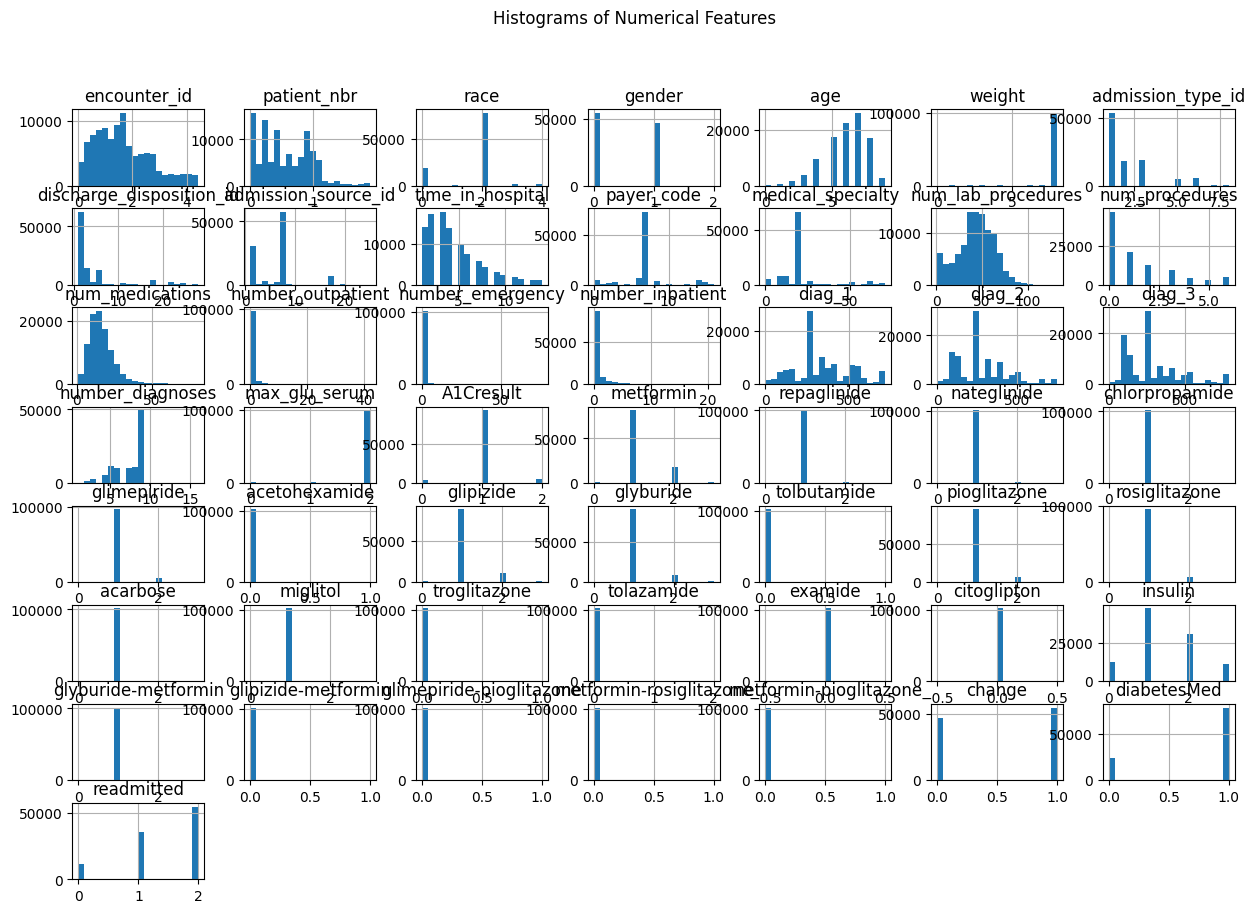

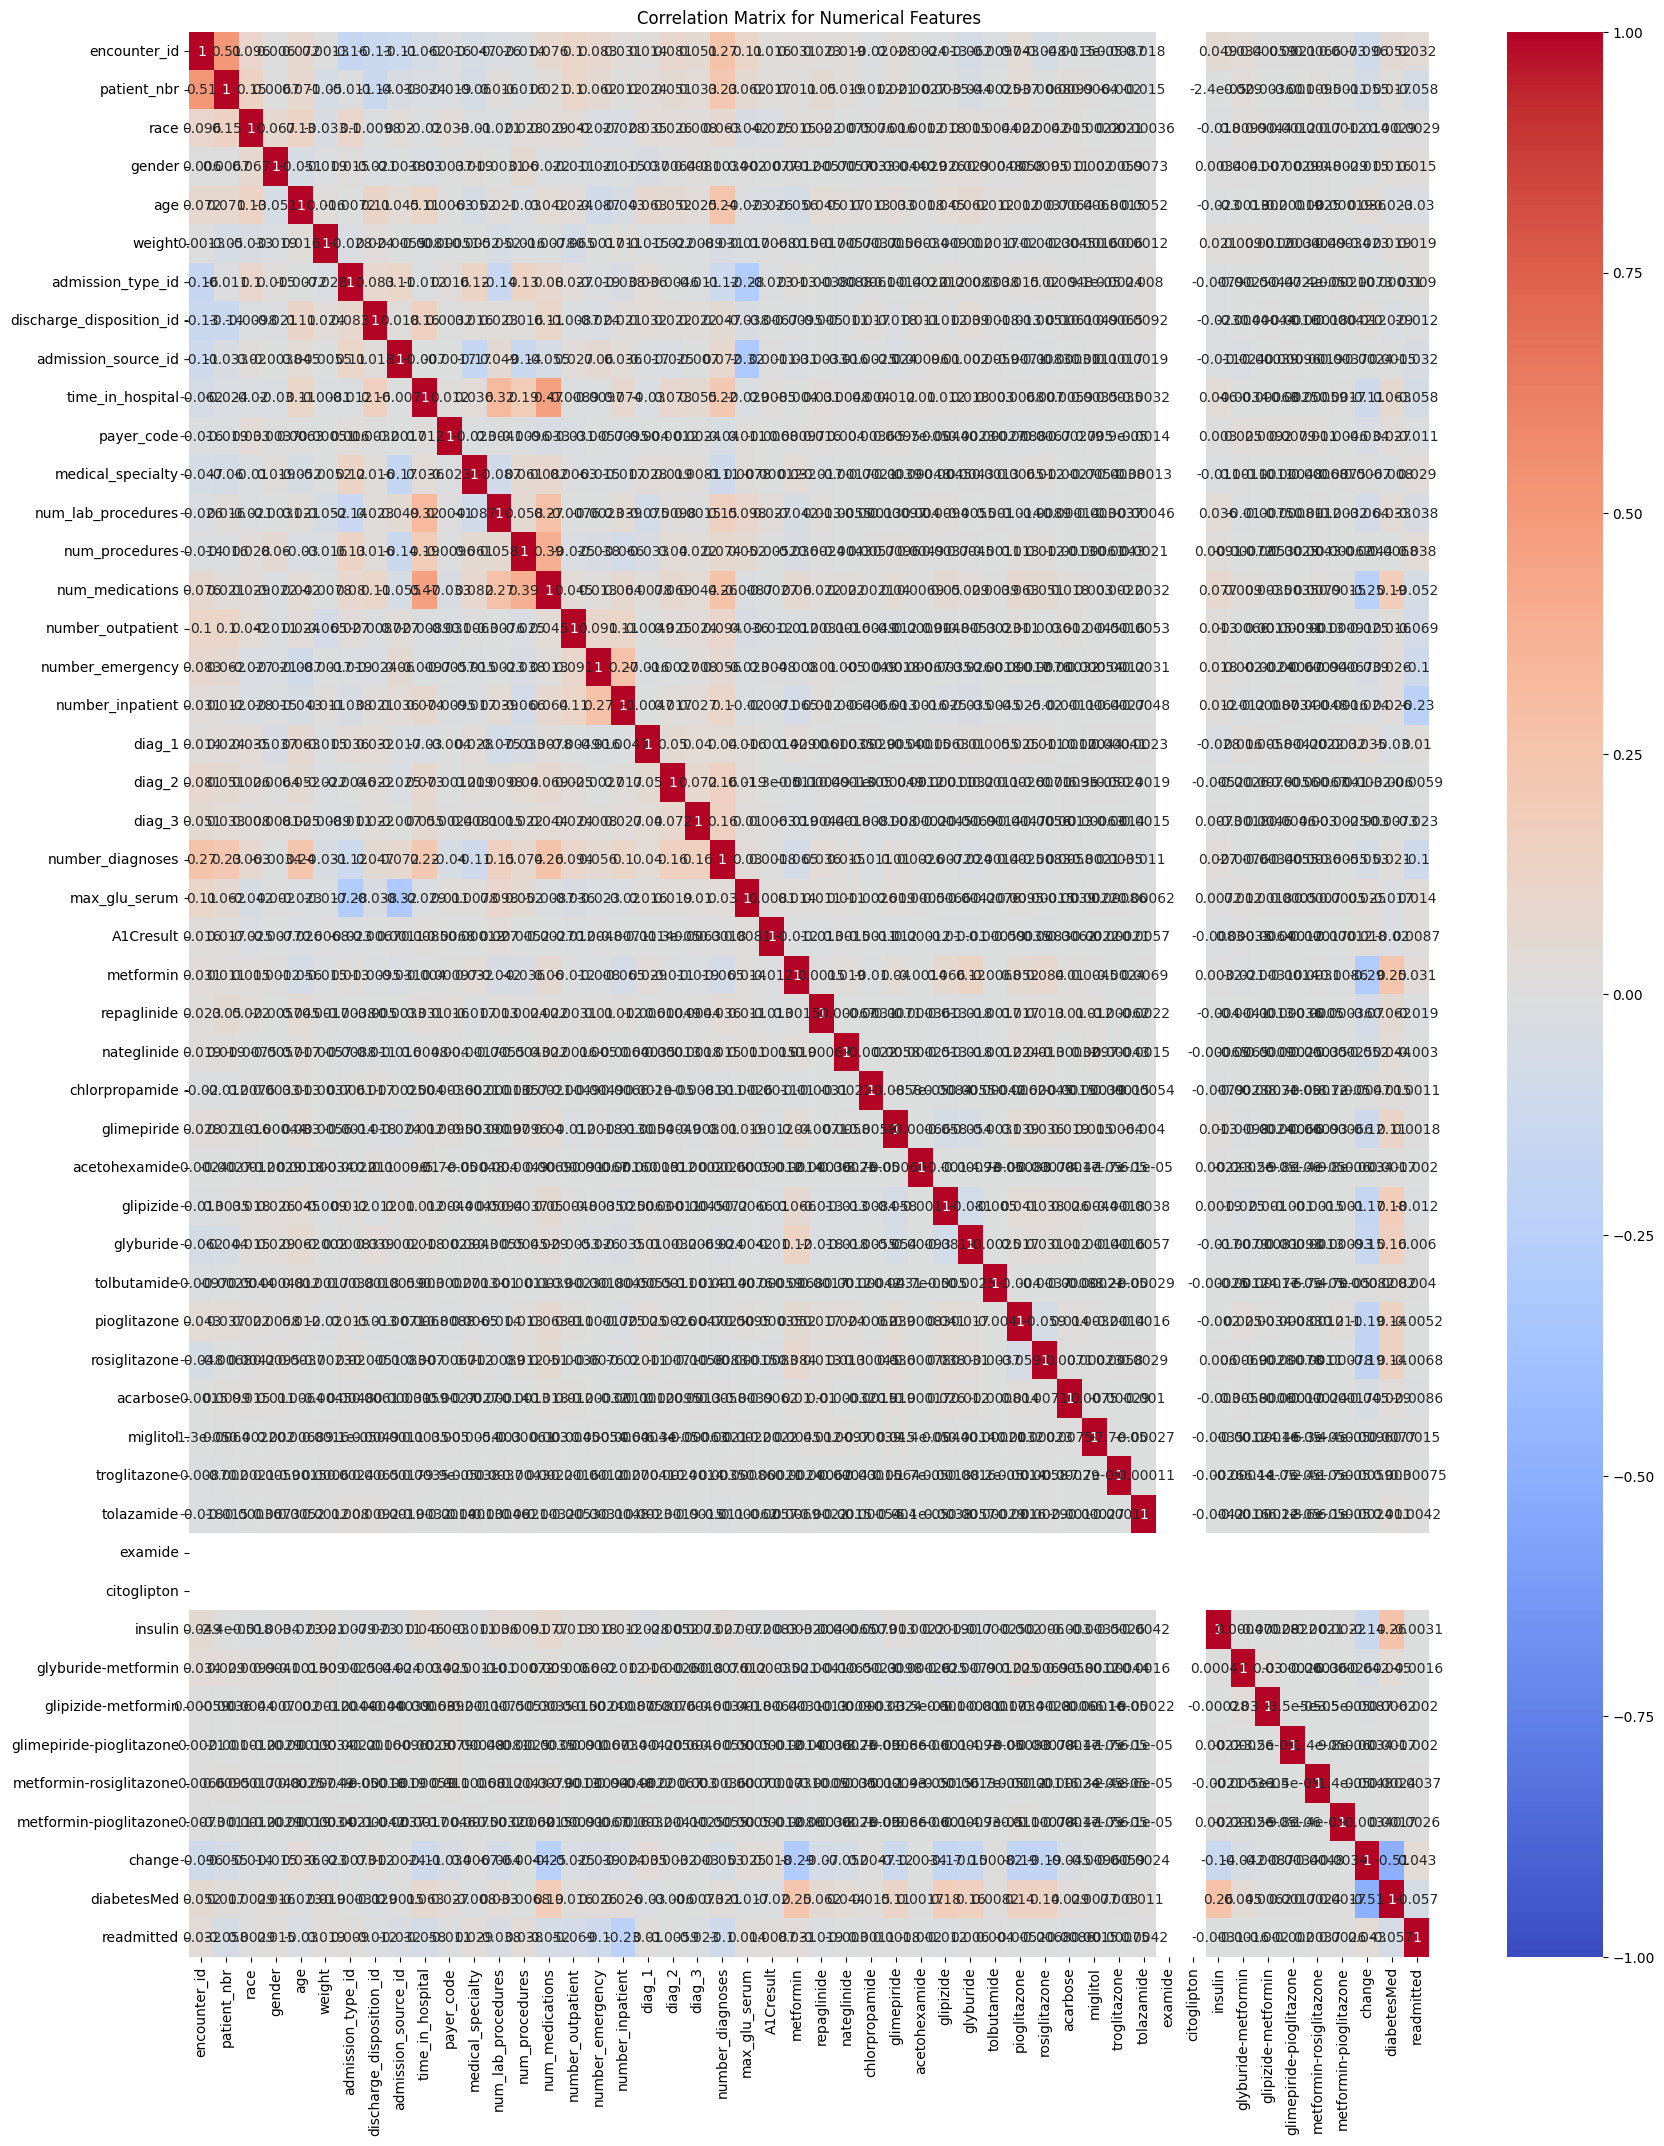

In [106]:


# Since there are missing values, we can fill them in with 0 , mean or mode. since there are categorical data , we chose for mode
# Filling missing values with mode (for categorical features)
diabetes.fillna(diabetes.mode().iloc[0], inplace=True)

#  Visualizing distributions of numerical and categorical features

numerical_features = diabetes.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = diabetes.select_dtypes(include=['object']).columns.tolist()

# Plotting histograms for numerical features --- check for outliers
diabetes[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

#  Correlation Matrix for Numerical Features 
correlation_matrix = diabetes[numerical_features].corr()

plt.figure(figsize=(20, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


#### Histograms: We plot histograms for the numerical features to understand their distribution. This helps identify any skewness or outliers in the data. We dont see any outliers here.

#### The highest  level of correlation shown is at 0.51 from the matrix . So we will not be removing any columns for high correlation . 

In [107]:
# Verifying that there are no correlated features in the data with a threshold > 0.6
correlated_features=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)


[]


In [108]:
# Encode categorical features using LabelEncoder (for simplicity)
le = LabelEncoder()
for col in categorical_features:
    diabetes[col] = le.fit_transform(diabetes[col])

# Feature Importance using Random Forest
# Separate the target variable and features
X = diabetes.drop('readmitted', axis=1)
y = diabetes['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get distinct values for y to get optimum number for k Means
unique_values = y.unique()

# Print the unique values
print("Unique values in 'readmitted':", unique_values)


# Standardize the numerical features for KMeans, PCA, and NMF
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Unique values in 'readmitted': [2 1 0]


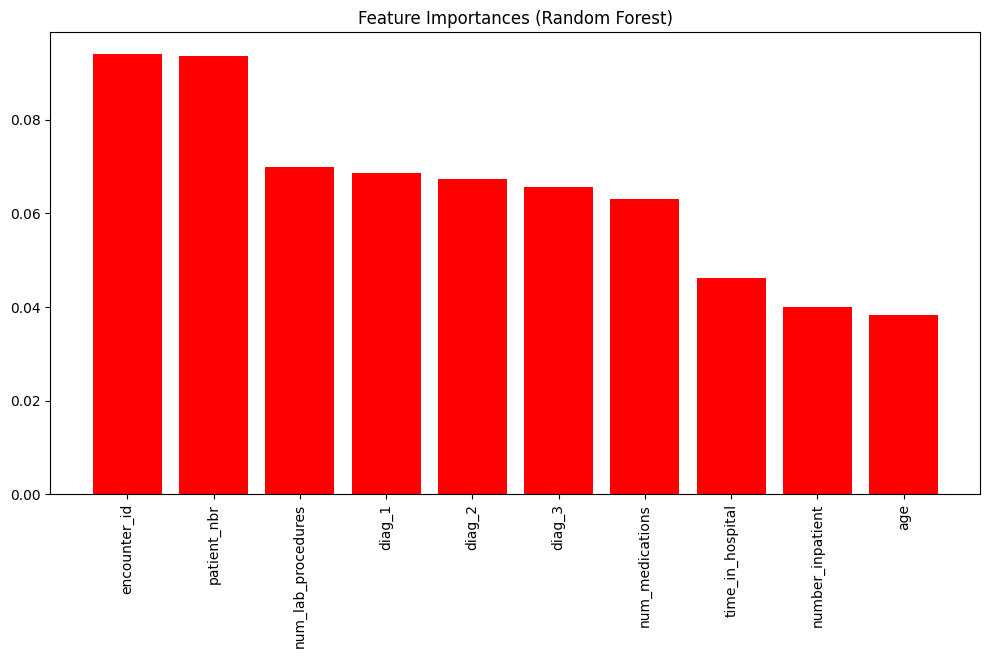

Model Accuracy: 59.96%


In [109]:
# Train a Random Forest model to determine feature importance and check the accuracy for the same. ( Supervised Learning model for comparison.)

# Train a Random Forest model to determine feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Plot Feature Importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(10), importances[indices[:10]], color='r', align='center')
plt.xticks(range(10), X.columns[indices[:10]], rotation=90)
plt.show()

#  Evaluate the model on the test data 
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


####  So far, we have finished data cleaning . We will now create and train the model for K Means Clustering and verify the accuracy for the same. 

Silhouette Score for KMeans: 0.048


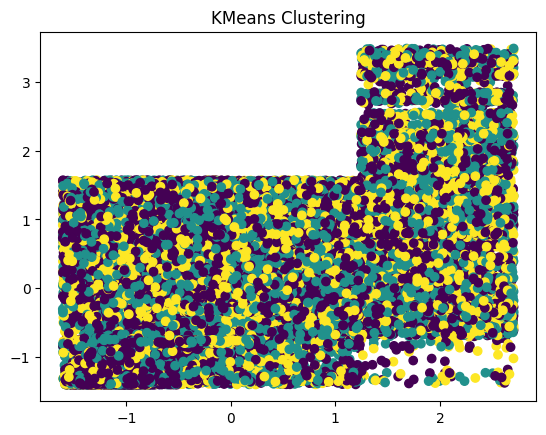

In [110]:
### Unsupervised Model Training


# X and y were already prepared before .. 


##################################################
# K-Means Clustering on Original Data
##################################################

kmeans = KMeans(n_clusters=3, random_state=33)
kmeans.fit(X_train_scaled)

# Calculate silhouette score for KMeans
silhouette_kmeans = silhouette_score(X_train_scaled, kmeans.labels_)
print(f'Silhouette Score for KMeans: {silhouette_kmeans:.3f}')

# Silhouette plot
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("KMeans Clustering")
plt.show()


##### Since the clustering did not work out well, we can go with PCA + clustering in the next section.,

Silhouette Score for PCA + KMeans: 0.348


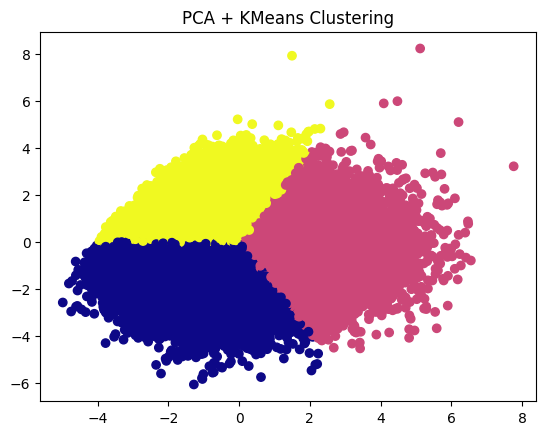

In [111]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)


# KMeans clustering after PCA
kmeans_pca = KMeans(n_clusters=3, random_state=33)
kmeans_pca.fit(X_train_pca)


# Silhouette score for PCA + KMeans
silhouette_kmeans_pca = silhouette_score(X_train_pca, kmeans_pca.labels_)
print(f'Silhouette Score for PCA + KMeans: {silhouette_kmeans_pca:.3f}')

# Silhouette plot
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_pca.labels_, cmap='plasma')
plt.title("PCA + KMeans Clustering")
plt.show()

###### The above clustering looks much better. we can also try with using NMF on the feautures , then retrying K Means . 

Silhouette Score for NMF + KMeans: 0.886


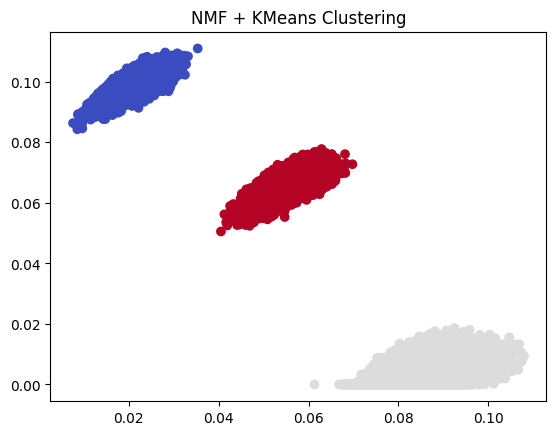

In [112]:
scaler_minmax = MinMaxScaler()

# Apply MinMaxScaler to ensure non-negative values for NMF
X_train_scaled_nonneg = scaler_minmax.fit_transform(X_train_scaled)


# Step 2: Apply NMF for dimensionality reduction
nmf = NMF(n_components=2, init='nndsvda', random_state=33, max_iter=500)
X_train_nmf = nmf.fit_transform(X_train_scaled_nonneg)


# KMeans clustering after NMF
kmeans_nmf = KMeans(n_clusters=3, random_state=42)
kmeans_nmf.fit(X_train_nmf)


# Silhouette score for NMF + KMeans
silhouette_kmeans_nmf = silhouette_score(X_train_nmf, kmeans_nmf.labels_)
print(f'Silhouette Score for NMF + KMeans: {silhouette_kmeans_nmf:.3f}')

# Silhouette plot
plt.scatter(X_train_nmf[:, 0], X_train_nmf[:, 1], c=kmeans_nmf.labels_, cmap='coolwarm')
plt.title("NMF + KMeans Clustering")
plt.show()

###### The above chart shows very high distance between clusters . This is an issue and shows unblanaced clusters with too much high variance in the data , so we are better of skipping this approach.

###### K means is not used for prediction on its own , however that function does exist in sklearn . We will be trying to map cluster labels to the true class labels based on confusion matrix and then 
###### trying to do a logistic regression post the K Means clustering on the features.

In [115]:
#  Function to map clusters to true class labels based on confusion matrix
def map_clusters_to_labels(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    cluster_to_label = {}
    for i in range(len(conf_matrix)):
        cluster_to_label[i] = np.argmax(conf_matrix[i])
    return np.array([cluster_to_label[cluster] for cluster in y_pred])


# Map clusters to class labels for the training data
y_train_clustered_pca = map_clusters_to_labels(y_train, kmeans_pca.labels_)

#  Train a Logistic Regression model on the training data
log_reg_pca = LogisticRegression(random_state=5,solver='liblinear', max_iter=500)
log_reg_pca.fit(X_train_pca, y_train_clustered_pca)

X_test_pca = pca.fit_transform(X_test_scaled)
#  Predict on the test data
y_pred_test_pca = log_reg_pca.predict(X_test_pca)

#  Evaluate the Logistic Regression model
accuracy_pca = accuracy_score(y_test, y_pred_test_pca)
print(f"Accuracy on test set for PCA + K means + Logistic Regression: {accuracy_pca *100:.3f}")



Accuracy on test set for PCA + K means + Logistic Regression: 27.258


##### Since

In [116]:



# Apply NMF for dimensionality reduction
# Set the number of components (latent features)
nmf_model = NMF(n_components=47, random_state=5, init='nndsvda', max_iter=1000,alpha_H=0.1,alpha_W=0.1)

# NMF expects non-negative data, so we use the absolute value of scaled data (because scaling can produce negative values)
X_train_nmf = nmf_model.fit_transform(abs(X_train_scaled))
X_test_nmf = nmf_model.transform(abs(X_test_scaled))

# Train a classifier (e.g., Logistic Regression) on the NMF-transformed data
clf = LogisticRegression(solver='liblinear',random_state=42, max_iter=100)
clf.fit(X_train_nmf, y_train)

#  Predict on the test data
y_pred = clf.predict(X_test_nmf)

#  Evaluate the classifier
accuracy_nmf = accuracy_score(y_test, y_pred)
print(f'Accuracy for NMF + Logistic Regression: {accuracy_nmf * 100:.2f}%')

Accuracy for NMF + Logistic Regression: 55.60%


NMF - Hyper parameters :
n_components=10 to n_components=47 : - how many NMF model should extract from the data

init (Initialization Method)

'random': Starts with random values, which can sometimes help improve convergence.
'nndsvda': This is Non-negative Double Singular Value Decomposition (NNDSVDa), which is a smart initialization method.

alpha (Regularization)
Explanation: This adds a regularization term to the loss function, preventing overfitting by penalizing large weights.
Suggested Range: You can try alpha=0.01, alpha=0.1, and alpha=1.0.

Logistic Regression - Hyperparameters
solver (Optimization Algorithm)

'liblinear': Good for smaller datasets 
'lbfgs': larger
'saga': larger


In [118]:

#  Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Apply PCA for dimensionality reduction
# You can adjust n_components based on the dataset (e.g., keep 95% of the variance)
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_train_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

#  Train a Logistic Regression model
clf = LogisticRegression(solver='liblinear', random_state=42, max_iter=500)
clf.fit(X_train_pca, y_train)

#  Predict on the test data
y_pred = clf.predict(X_test_pca)

#  Evaluate the Logistic Regression model
accuracy_lg_pca = accuracy_score(y_test, y_pred)
print(f"Accuracy for PCA + Logistic Regression: {accuracy_lg_pca*100:.3f}")




Original number of features: 49
Reduced number of features after PCA: 43
Accuracy for PCA + Logistic Regression: 57.212


# End  Discussion
### Clustering Metrics 
Silhouette Score for KMeans: 0.048

Silhouette Score for PCA + KMeans: 0.348

Silhouette Score for NMF + KMeans: 0.886

Silhouette scores are from a range of 0 to 1 , with the higher being the better . That said, a very high degree of separation may be be due to unbalanced data.

### Accuracy Metrics 

Accuracy for K Means + Logistic Regression: 27%

Accuracy for PCA + K Means + Logistic Regression: 37%

Accuracy for NMF + Logistic Regression: 55.60%

Accuracy for PCA + Logistic Regression: 57.21%

Activites :
Data Cleaning , Removing correlated data and checking histograms for outliers to exclude . 
Generated scaled version of data for unsupervised learning model - K Means  and generated the cluster silhoutte plot
Did dimensional reduction using PCA then used clustered model - K Means  and generated the cluster silhoutte plot
Did dimensional reduction using NMF then used clustered model - K Means  and generated the cluster silhoutte plot

Used Logistic regression with each of K Means , PCA and NMF and compared it with test data . Accuracy results are given as above . 

Modified hyperparameters ( model  , max_iter , C ) for logistic regression to get a better score . 

# Conclusion : 

PCA approach and NMF approach have given the best results . This approach needs more data to be trained further. we can also try other models insted of logistic regression for the final accuracy .

In [120]:
print(f"Accuracy on test set with Random Forest with feature selection : {accuracy *100:.3f}")
print(f"Accuracy on test set with PCA & K Means & Logistic Regression  : {accuracy_pca *100:.3f}")
print(f"Accuracy on test set with NMF & Logistic Regression            : {accuracy_nmf *100:.3f}")
print(f"Accuracy for PCA + Logistic Regression                         : {accuracy_lg_pca*100:.3f}")

Accuracy on test set with Random Forest with feature selection : 59.964
Accuracy on test set with PCA & K Means & Logistic Regression  : 27.258
Accuracy on test set with NMF & Logistic Regression            : 55.601
Accuracy for PCA + Logistic Regression                         : 57.212
